# Importing Libraries

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

# Importing Dataset
##### dataset link:
https://www.kaggle.com/datasets/uciml/biomechanical-features-of-orthopedic-patients?select=column_2C_weka.csv
## Content
Field Descriptions:

Each patient is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (each one is a column):

pelvic incidence
pelvic tilt
lumbar lordosis angle
sacral slope
pelvic radius
grade of spondylolisthesis

In [4]:
dataset=pd.read_csv('Dataset/orthopedic dataset.csv')
dataset.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [5]:
print("column Names:",dataset.columns.values)

column Names: ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']


In [6]:
dataset.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          1180 non-null   float64
 1   pelvic_tilt numeric       1180 non-null   float64
 2   lumbar_lordosis_angle     1180 non-null   float64
 3   sacral_slope              1180 non-null   float64
 4   pelvic_radius             1180 non-null   float64
 5   degree_spondylolisthesis  1180 non-null   float64
 6   class                     1180 non-null   object 
dtypes: float64(6), object(1)
memory usage: 64.7+ KB


In [8]:
dataset.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000
mean,60.628995,19.534941,42.966891,34.621027,115.654789,39.428121
std,12.212527,10.779453,21.270700,12.197810,14.427055,40.814087
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,50.804924,12.537992,28.957819,25.065929,107.690466,11.400298
50%,61.542890,17.977784,38.926371,33.918037,116.250917,33.157646
75%,69.658921,24.822631,48.426306,43.163549,124.118877,55.995454
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [9]:
dataset['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

# Data Analysis

In [10]:
dataset_num=dataset.select_dtypes(include=['float64','int64'])
# print(dataset_num.head())

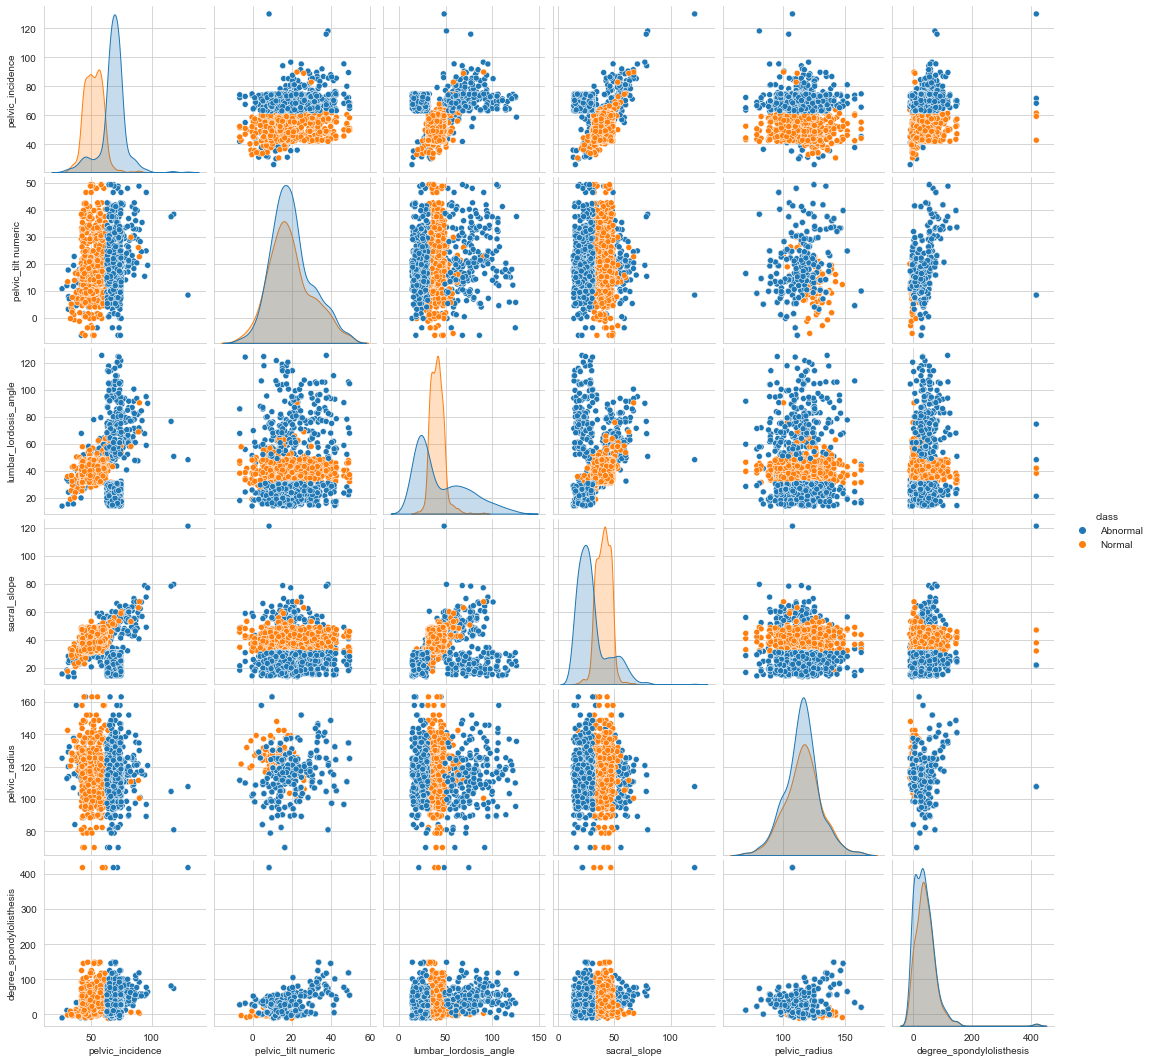

In [11]:
sns.set_style("whitegrid")
sns.pairplot(dataset,hue="class",diag_kind = "kde",kind = "scatter")
plt.show()

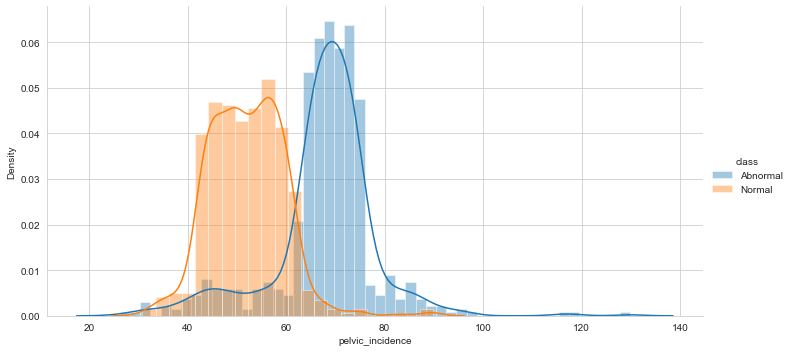

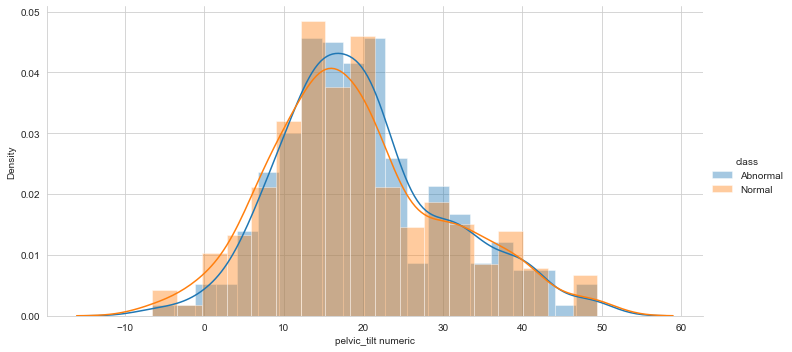

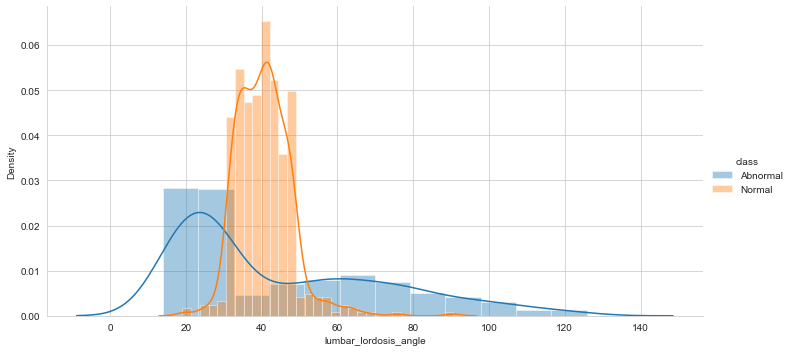

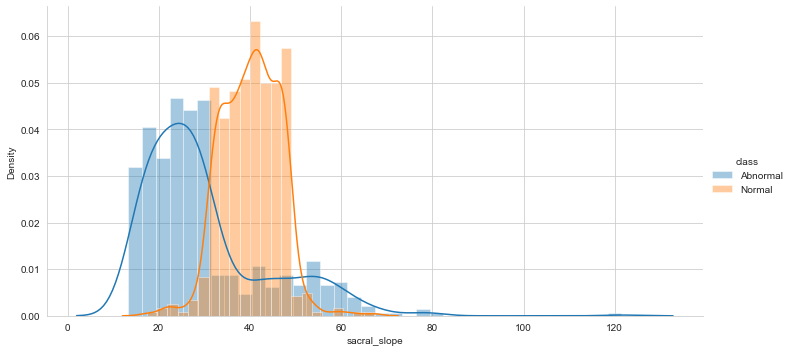

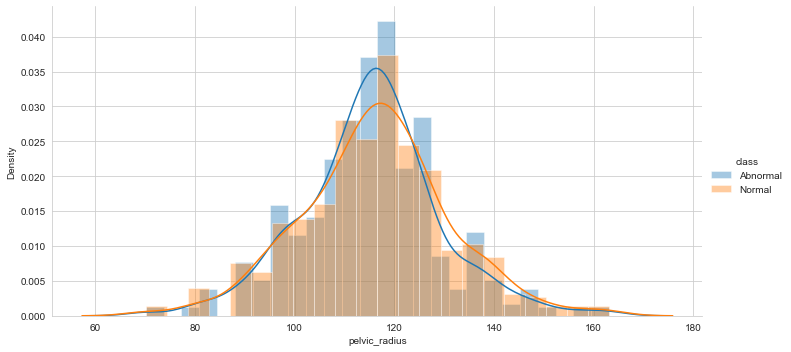

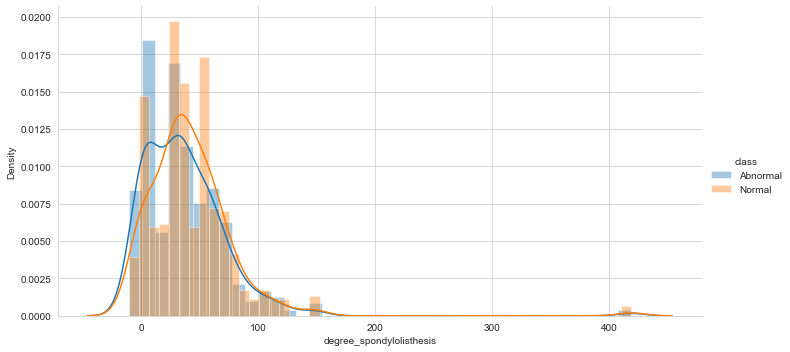

In [12]:
for name in dataset.columns.values[:-1]:
    sns.FacetGrid(dataset, hue="class",height=5,aspect=2).map(sns.distplot, name).add_legend()
plt.show()

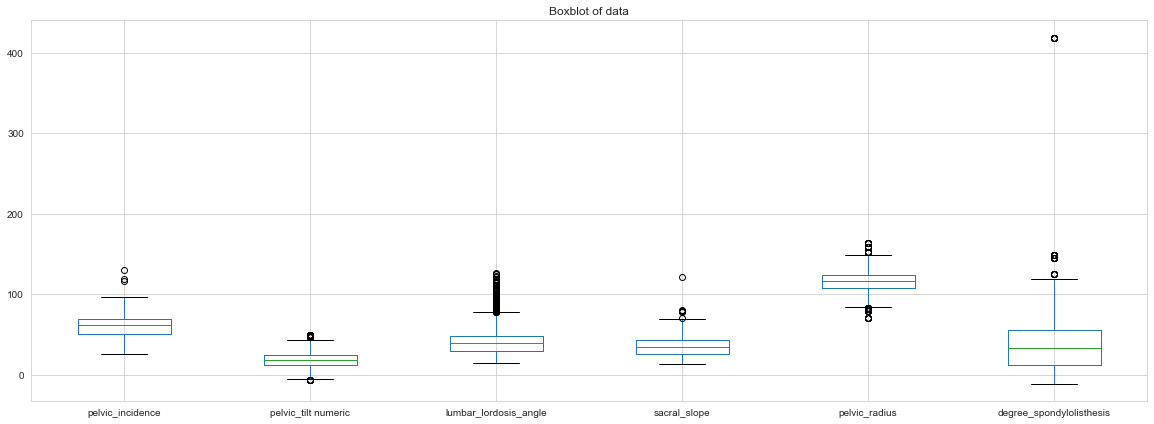

In [13]:
dataset.boxplot(column=['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
 'sacral_slope' ,'pelvic_radius', 'degree_spondylolisthesis' ],figsize=(20,7))
plt.title("Boxblot of data")
plt.show()

Abnormal    649
Normal      531
Name: class, dtype: int64


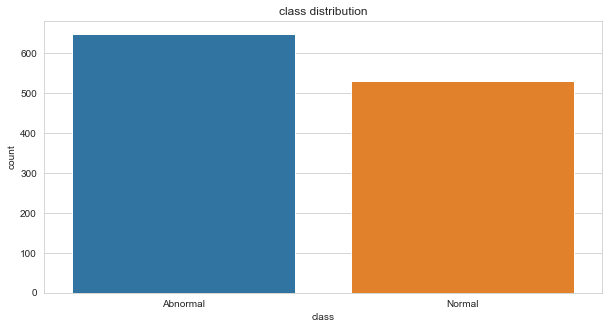

In [15]:
print(dataset['class'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot('class',data=dataset)
plt.title("class distribution")
plt.show()

In [17]:
dataset=dataset.replace({
    'class':{'Normal':1,'Abnormal':0}
})
dataset.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


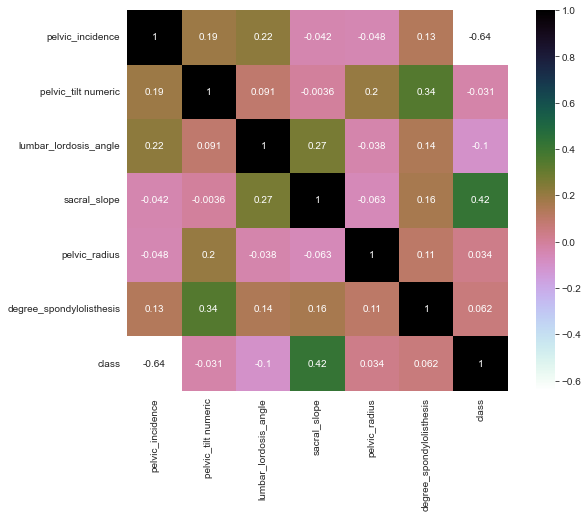

In [18]:
corr=dataset.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True,cmap='cubehelix_r',square=True)
plt.show()

# Cheking: Missing values

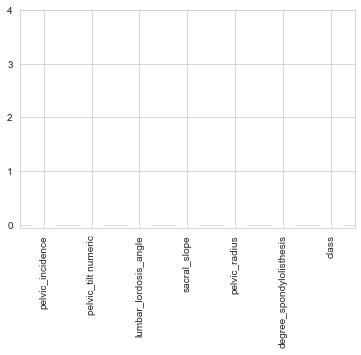

In [19]:
dataset.isnull().sum(axis=0).plot.bar()
plt.yticks(np.arange(0,5))
plt.show()

# Splitting dataset

In [20]:
data_input=dataset.drop(columns='class')
data_output=dataset['class']
data_input.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [21]:
data_output.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [22]:
X, X_test, y, y_test = train_test_split(data_input, data_output, test_size=0.30, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('------------------------')
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('------------------------')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (578, 6)
y_train: (578,)
------------------------
X_val: (248, 6)
y_val: (248,)
------------------------
X_test: (354, 6)
y_test: (354,)


In [23]:
y_train.value_counts()

0    313
1    265
Name: class, dtype: int64

In [27]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1.0, random_state=0)
X_train_balanced, y_train_balaned = ros.fit_resample(X_train, y_train)
y_train_balaned.value_counts()

1    313
0    313
Name: class, dtype: int64

# Helper function: Evaluate model

In [28]:
def eval_model(model,X_train,y_train,X_val,y_val):
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    
    return(acc_train,acc_val)

# Applying KNN

# Hyperparameter tuning
### Tuning n_neighbors

In [51]:
n_nighbors_values=np.arange(1,31)
accuracy_train_values = []
accuracy_val_values = []

for n_nigh in n_nighbors_values:
    knn_model=KNeighborsClassifier(n_neighbors=n_nigh)
    knn_model.fit(X_train_balanced,y_train_balaned)
    y_pred_train=knn_model.predict(X_train_balanced)
    y_pred_val=knn_model.predict(X_val)
    acc_tarin=accuracy_score(y_train_balaned,y_pred_train)
    acc_val=accuracy_score(y_val,y_pred_val)
    accuracy_train_values.append(acc_tarin)
    accuracy_val_values.append(acc_val)
    
    
print("Best accuracy of validation is {} with K = {}".format(max(accuracy_val_values),1+accuracy_val_values.index(max(accuracy_val_values))))
print("Best accuracy is of train {} with K = {}".format(max(accuracy_train_values),1+accuracy_train_values.index(max(accuracy_train_values))))

Best accuracy of validation is 0.9193548387096774 with K = 11
Best accuracy is of train 1.0 with K = 1


In [52]:
results_knn=pd.DataFrame({
    'n_neighbours': n_nighbors_values,
    'accuracy_train': accuracy_train_values,
    'accuracy_val': accuracy_val_values
})
results_knn

,n_neighbours,accuracy_train,accuracy_val
0,1,1.000000,0.907258
1,2,0.952077,0.862903
2,3,0.936102,0.887097
3,4,0.929712,0.887097
4,5,0.920128,0.903226
5,6,0.916933,0.903226
6,7,0.904153,0.903226
7,8,0.908946,0.911290
8,9,0.899361,0.907258
9,10,0.910543,0.911290


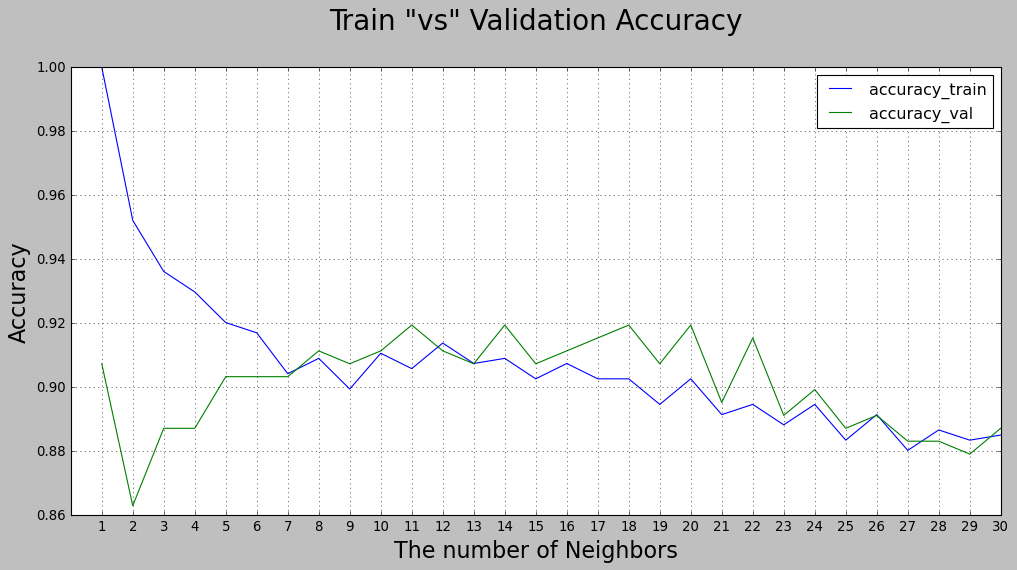

In [54]:
results_knn.plot(x='n_neighbours', y=['accuracy_train', 'accuracy_val'], figsize=(15, 7))
plt.title('Train "vs" Validation Accuracy\n',fontsize=25)
plt.xlabel('The number of Neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(np.arange(1,31))
plt.grid()
plt.show()

According to the previous plot, we select n_neighbours = `11` as the best value for n_neighbours

In [90]:
weights_values = ['uniform', 'distance']
accuracy_train_values = []
accuracy_val_values = []

for w in weights_values:
    knn_model=KNeighborsClassifier(n_neighbors=11,weights=w)
    knn_model.fit(X_train_balanced,y_train_balaned)
    y_pred_train=knn_model.predict(X_train_balanced)
    y_pred_val=knn_model.predict(X_val)
    acc_tarin=accuracy_score(y_train_balaned,y_pred_train)
    acc_val=accuracy_score(y_val,y_pred_val)
    accuracy_train_values.append(acc_tarin)
    accuracy_val_values.append(acc_val)
    
    
    
results_knn=pd.DataFrame({
    'weights': weights_values,
    'accuracy_train': accuracy_train_values,
    'accuracy_val': accuracy_val_values
})
results_knn

,weights,accuracy_train,accuracy_val
0,uniform,0.905751,0.919355
1,distance,1.000000,0.915323


<Figure size 800x400 with 0 Axes>

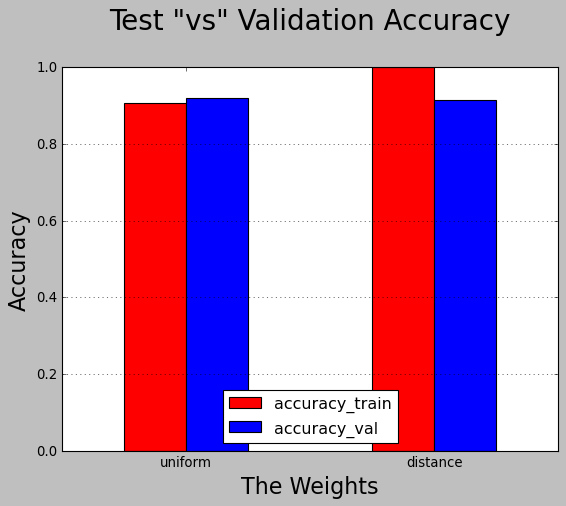

In [118]:
plt.figure(figsize=(10,5))
results_knn.plot.bar(x='weights', y=['accuracy_train', 'accuracy_val'],color=['red','blue'])
plt.title('Test "vs" Validation Accuracy\n',fontsize=25)
plt.xlabel('The Weights',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(rotation=360)
plt.legend(loc='lower center')
plt.grid(axis='y')
plt.show()

According to the previous plot we will select the weight = `uniform`

# Final Knn Test

In [92]:
best_knn_model=KNeighborsClassifier(n_neighbors=11,weights='uniform')
best_knn_model.fit(X_train_balanced,y_train_balaned)
y_pred_test=best_knn_model.predict(X_test)
knn_acc_final=accuracy_score(y_test,y_pred_test)
print(round(knn_acc_final,3)*100,"%")

90.7 %


In [60]:
print("the Real first 10 value \n")
for i in y_test[:10]:
    print(i,end=" - ")
print('\n---------------------------------------\n')
print("the prediction first 10 value \n")
for i in y_pred_test[:10]:
    print(i,end=" - ")

the Real first 10 value 

0 - 1 - 1 - 1 - 1 - 1 - 0 - 0 - 1 - 1 - 
---------------------------------------

the prediction first 10 value 

0 - 1 - 1 - 1 - 1 - 1 - 0 - 0 - 1 - 1 - 

confusion matrix is 
 [[171  27]
 [  6 150]]


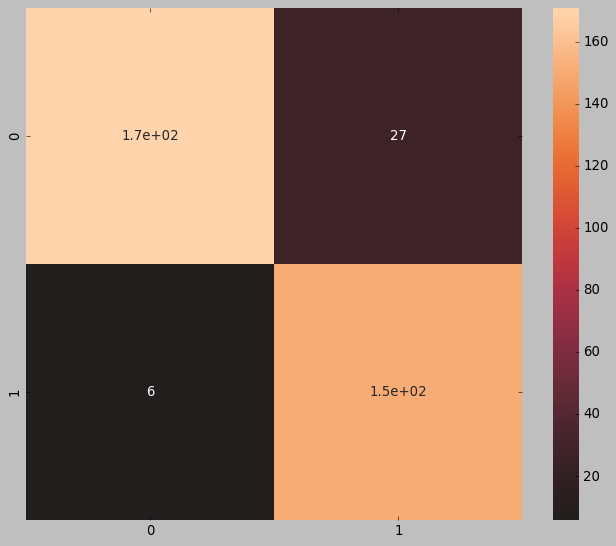

In [61]:
#calculate confusion matrix
plt.figure(figsize=(10,8))
cm_knn=confusion_matrix(y_test, y_pred_test)
print('confusion matrix is \n',cm_knn)
sns.heatmap(cm_knn,annot=True,center=True)
plt.show()

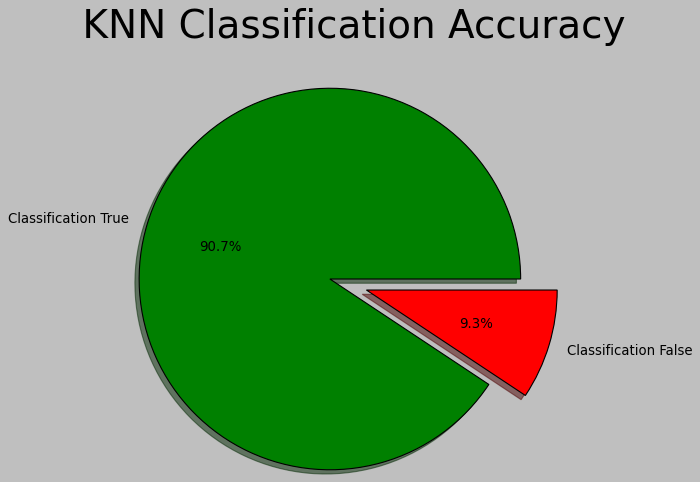

In [82]:
plt.style.use('classic')
plt.pie([knn_acc_final,1-knn_acc_final],labels=('Classification True','Classification False')
        ,explode=[0.1,0.1],autopct="%1.1f%%",shadow=True,colors=['green','red'])
plt.axis('equal')
plt.title(' KNN Classification Accuracy\n',fontsize=35)
plt.show()

# Applying naive bayes NB

## Model 1: Gaussian Naive Bayes

In [63]:
nb_model1 = GaussianNB() 
acc_train1, acc_val1 = eval_model(nb_model1, X_train, y_train, X_val, y_val)
print(acc_train1)
print(acc_val1)

0.9013840830449827
0.9354838709677419


## Model 2:  Bernoulli Naive Bayes

In [64]:
nb_model2 = BernoulliNB()
acc_train2, acc_val2 = eval_model(nb_model2, X_train, y_train, X_val, y_val)
print(acc_train2)
print(acc_val2)

0.5467128027681661
0.5604838709677419


In [120]:
results = pd.DataFrame({
    'model': ['GaussianNB',  'BernoulliNB'],
    'acc_train': [acc_train1, acc_train2],
    'acc_val': [acc_val1, acc_val2],
})

results

,model,acc_train,acc_val
0,GaussianNB,0.901384,0.935484
1,BernoulliNB,0.546713,0.560484


<Figure size 800x400 with 0 Axes>

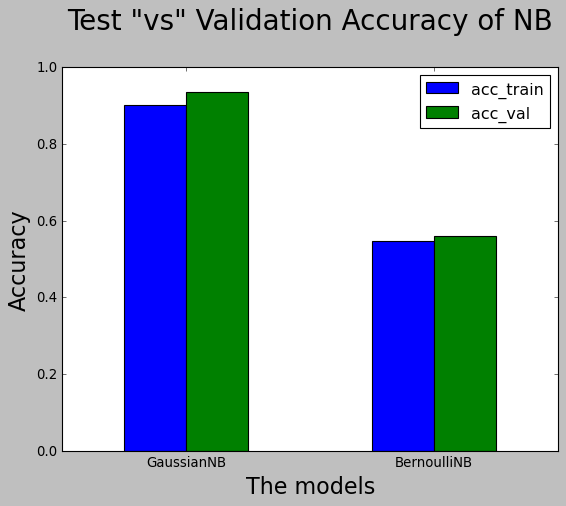

In [121]:
plt.figure(figsize=(10,5))
results.plot.bar(x='model',y=['acc_train','acc_val'])
plt.title('Test "vs" Validation Accuracy of NB\n',fontsize=25)
plt.xlabel('The models',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(rotation=360)
plt.show()

# final NB test

In [76]:
best_nb_model=GaussianNB()
best_nb_model.fit(X_train,y_train)
y_pred_test=best_nb_model.predict(X_test)
model_nb_final=accuracy_score(y_test,y_pred_test)
print(round(model_nb_final,3)*100,"%")

94.1 %


In [77]:
print("the Real first 10 value \n")
for i in y_test[:10]:
    print(i,end=" - ")
print('\n---------------------------------------\n')
print("the prediction first 10 value \n")
for i in y_pred_test[:10]:
    print(i,end=" - ")

the Real first 10 value 

0 - 1 - 1 - 1 - 1 - 1 - 0 - 0 - 1 - 1 - 
---------------------------------------

the prediction first 10 value 

0 - 1 - 1 - 1 - 1 - 1 - 0 - 0 - 1 - 1 - 

confusion matrix is 
 [[181  17]
 [  4 152]]


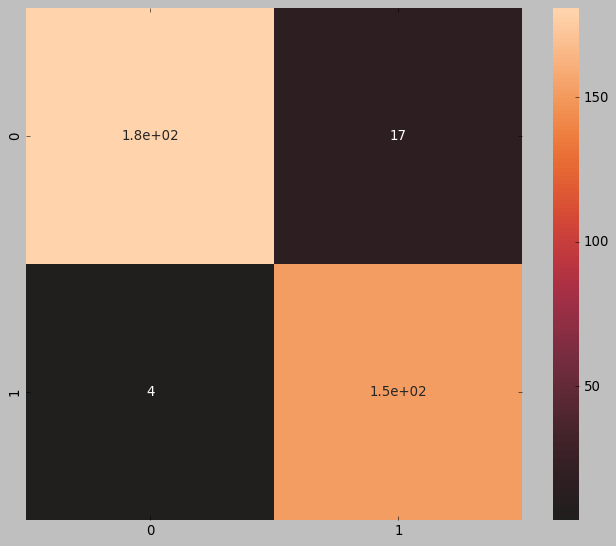

In [78]:
#calculate confusion matrix
plt.figure(figsize=(10,8))
cm_nb=confusion_matrix(y_test, y_pred_test)
print('confusion matrix is \n',cm_nb)
sns.heatmap(cm_nb,annot=True,center=True)
plt.show()

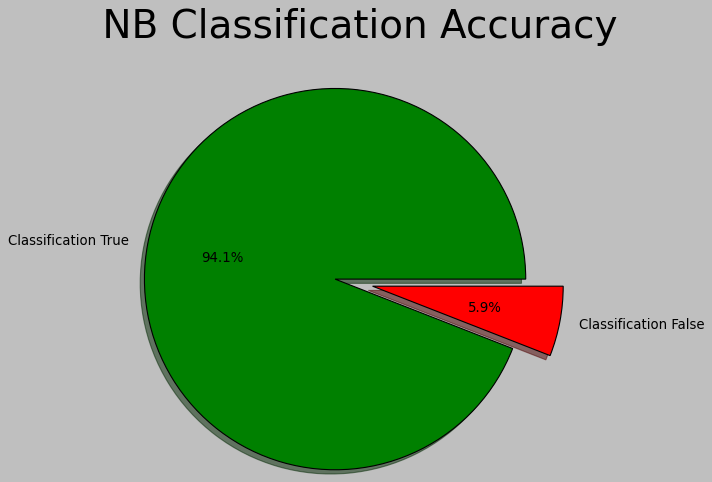

In [81]:
plt.style.use('classic')
plt.pie([model_nb_final,1-model_nb_final],labels=('Classification True','Classification False')
        ,explode=[0.1,0.1],autopct="%1.1f%%",shadow=True,colors=['green','red'])
plt.axis('equal')
plt.title(' NB Classification Accuracy\n',fontsize=35)
plt.show()

# Decision tree classifier

In [124]:
max_depth_values = list(range(1, 21))
acc_train_values = []
acc_val_values = []

for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    
    
    
print("Best accuracy of validation is {} with Mac Depth = {}".format(max(acc_val_values),1+acc_val_values.index(max(acc_val_values))))
print("Best accuracy is of train {} with Max Depth = {}".format(max(acc_train_values),1+acc_train_values.index(max(acc_train_values))))

Best accuracy of validation is 0.9435483870967742 with Mac Depth = 4
Best accuracy is of train 1.0 with Max Depth = 14


In [125]:
results = pd.DataFrame({
    'max_depth': max_depth_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results

,max_depth,acc_train,acc_val
0,1,0.891003,0.903226
1,2,0.906574,0.907258
2,3,0.930796,0.939516
3,4,0.935986,0.943548
4,5,0.953287,0.943548
5,6,0.965398,0.923387
6,7,0.975779,0.915323
7,8,0.982699,0.907258
8,9,0.987889,0.907258
9,10,0.991349,0.907258


<Figure size 800x400 with 0 Axes>

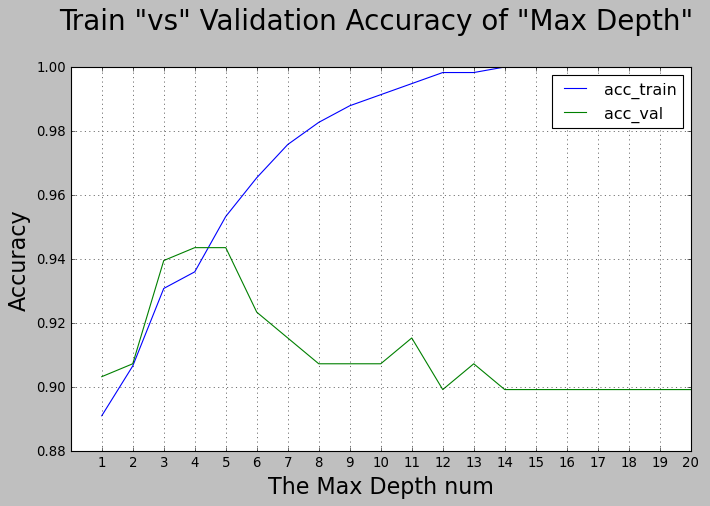

In [126]:
plt.figure(figsize=(10,5))
results.plot(x='max_depth', y=['acc_train', 'acc_val'], figsize=(10, 6))
plt.xticks(np.arange(1, 21))
plt.title('Train "vs" Validation Accuracy of "Max Depth" \n',fontsize=25)
plt.xlabel('The Max Depth num',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.grid(axis='both')
plt.show()

We select max_depth = `4`

In [127]:
criterion_values = ['gini', 'entropy']
acc_train_values = []
acc_val_values = []

for criterion in criterion_values:
    model = DecisionTreeClassifier(max_depth=4, criterion=criterion, random_state=0)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    
results = pd.DataFrame({
    'criterion': criterion_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results

,criterion,acc_train,acc_val
0,gini,0.935986,0.943548
1,entropy,0.942907,0.943548


<Figure size 800x400 with 0 Axes>

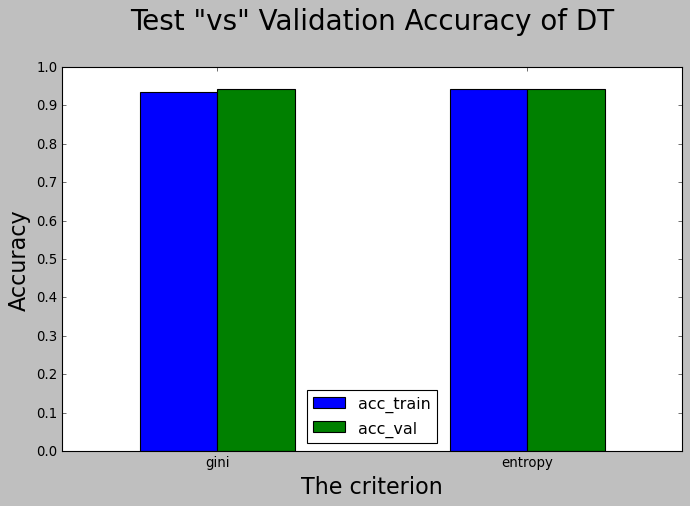

In [128]:
plt.figure(figsize=(10,5))
results.plot.bar(x='criterion', y=['acc_train', 'acc_val'], figsize=(10, 6))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.title('Test "vs" Validation Accuracy of DT\n',fontsize=25)
plt.xlabel('The criterion',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(rotation=360)
plt.legend(loc='lower center')
plt.grid(axis='y')
plt.show()

We select criterion = `entropy`

# Final Test

In [104]:
best_dt_model=DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=0)
best_dt_model.fit(X_train,y_train)
y_pred_test=best_dt_model.predict(X_test)
model_dt_final=accuracy_score(y_test,y_pred_test)
print(round(model_dt_final,3)*100,"%")

95.5 %


In [105]:
print("the Real first 10 value \n")
for i in y_test[:10]:
    print(i,end=" - ")
print('\n---------------------------------------\n')
print("the prediction first 10 value \n")
for i in y_pred_test[:10]:
    print(i,end=" - ")

the Real first 10 value 

0 - 1 - 1 - 1 - 1 - 1 - 0 - 0 - 1 - 1 - 
---------------------------------------

the prediction first 10 value 

0 - 1 - 1 - 1 - 1 - 1 - 0 - 0 - 1 - 1 - 

confusion matrix is 
 [[183  15]
 [  1 155]]


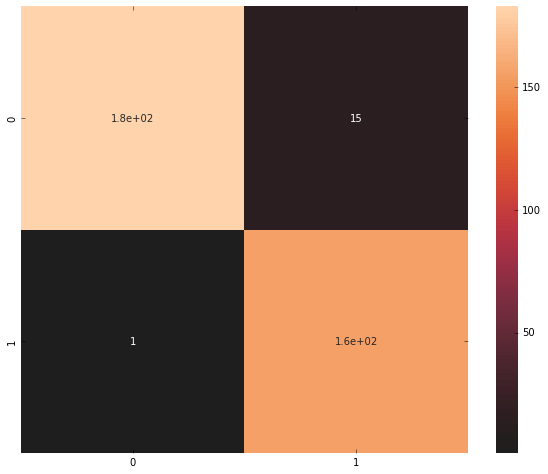

In [106]:
#calculate confusion matrix
plt.figure(figsize=(10,8))
cm_dt=confusion_matrix(y_test, y_pred_test)
print('confusion matrix is \n',cm_dt)
sns.heatmap(cm_dt,annot=True,center=True)
plt.show()

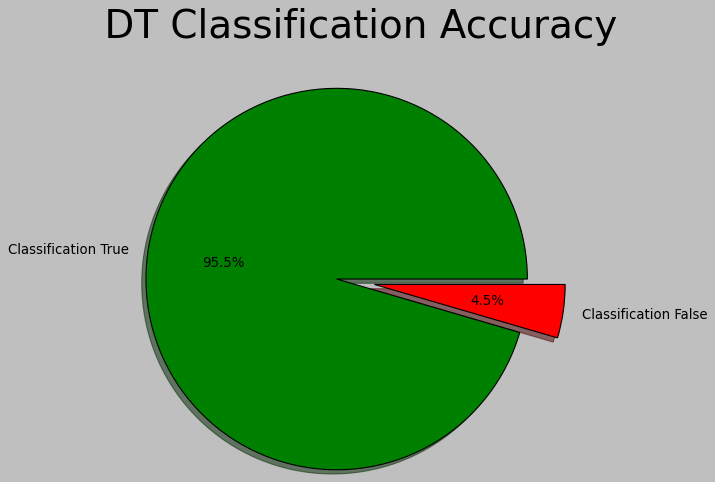

In [107]:
plt.style.use('classic')
plt.pie([model_dt_final,1-model_dt_final],labels=('Classification True','Classification False')
        ,explode=[0.1,0.1],autopct="%1.1f%%",shadow=True,colors=['green','red'])
plt.axis('equal')
plt.title(' DT Classification Accuracy\n',fontsize=35)
plt.show()

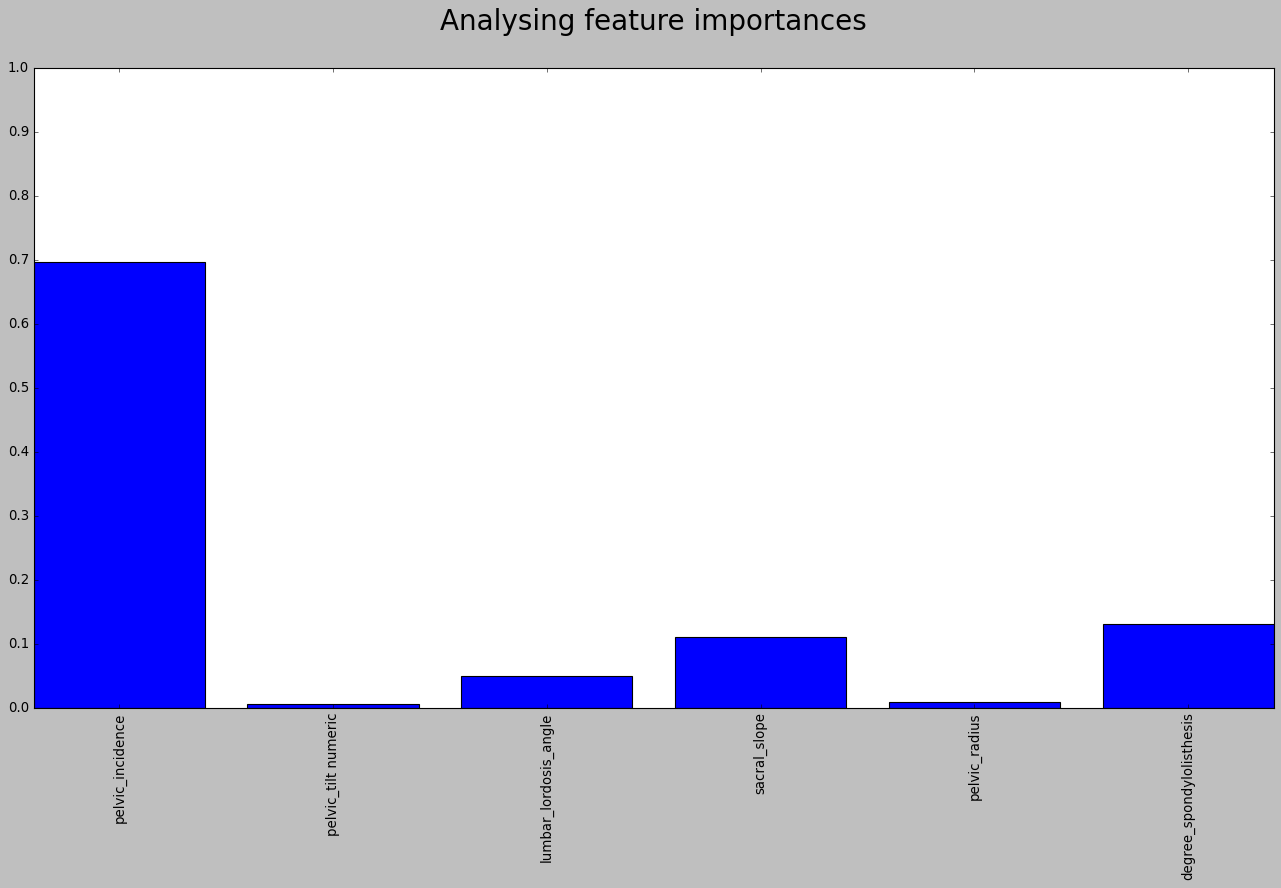

In [114]:
plt.figure(figsize=(20, 10))
plt.bar(X_train.columns, best_dt_model.feature_importances_)
plt.title("Analysing feature importances\n",fontsize=25)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,1.1,0.1))
plt.show()

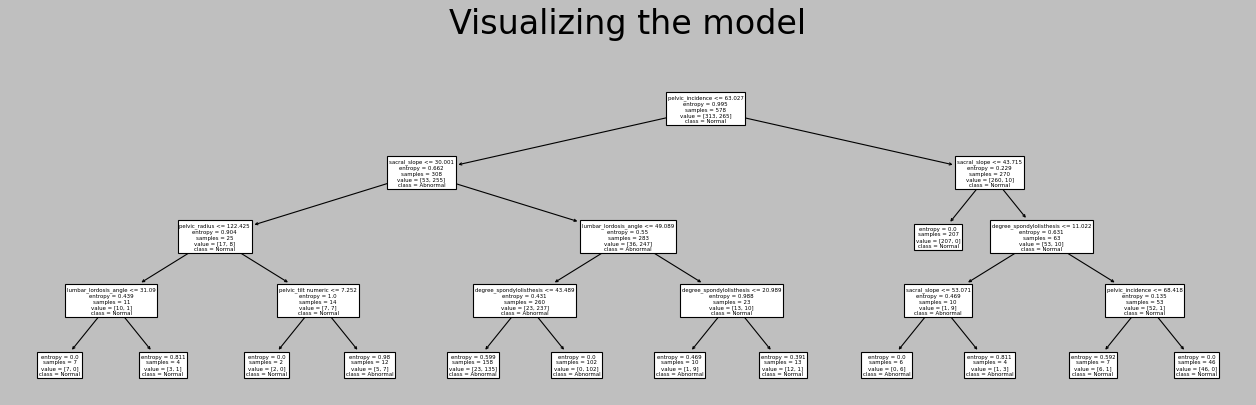

In [131]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 5))
plot_tree(best_dt_model, feature_names=X_train.columns, class_names=['Normal', 'Abnormal'])
plt.title('Visualizing the model\n',fontsize=30)
plt.show()

# End the code 

In [135]:
final_model=pd.DataFrame({
    'models':['KNN','Naive Bayes','Decision Tree'],
    'final accurase':[round(knn_acc_final,3)*100,round(model_nb_final,3)*100,round(model_dt_final,3)*100]
})

final_model

,models,final accurase
0,KNN,90.7
1,Naive Bayes,94.1
2,Decision Tree,95.5


<Figure size 800x400 with 0 Axes>

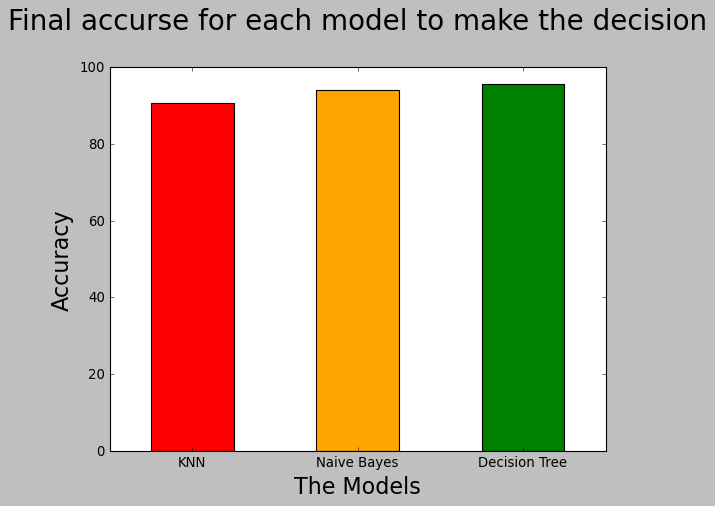

In [167]:
plt.figure(figsize=(10,5))
final_model.plot.bar(x='models',y='final accurase',color=['red','orange','green'],legend = False)
plt.title('Final accurse for each model to make the decision\n',fontsize=25)
plt.xlabel('The Models',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(rotation=360)
plt.show()